In [2]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [3]:
import numpy as np
import pandas as pd 
import os
import cv2
from sklearn.svm import SVC
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.color import rgb2gray
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import VGG16
from skimage.feature import hog
from skimage import data, exposure
import random
from keras import layers, losses
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

In [4]:
#path martim
#path = "../../../../DadosProj/UTKFace/"
#path alex
path = "../../../data_project/UTKFace/"

files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
100_0_0_20170112213500903.jpg.chip.jpg


In [5]:
images = []
ages = []
genders = []
counter = 0

for file in files:
    if counter == 2000:
        break
    
    image = cv2.imread(path+file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(200, 200))
    #image = image.astype('float32') / 255.0 #normalizing values on each point 
    image = image / 255.0

    #verificar se imagens todas estao no range 0 a 255 (se sao rgb)

    images.append(image)
    delimit = file.split('_')
    ages.append(int(delimit[0]))
    # first number is age (0-116 possible values)
    genders.append(int(delimit[1]))
    # second number is gender (0 for male, 1 for female)


    counter += 1

In [38]:
print(type(ages))
print(len(ages))
unique_values = list(set(ages))
print(unique_values)

<class 'list'>
2000
[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 100, 101, 103, 105, 110, 111, 115, 116]


In [6]:
def age_category(age):
    if age <= 1:
        return 1 #'Infant'
    elif age <= 12:
        return 2 #'Children'
    elif age <= 17:
        return 3 #'Adolescent'
    elif age <= 30:
        return 4 #'Young Adult'
    #elif age <= 60:
    #    return 5 #'Adult'
    else:
        return 5 #'Old Adult'

In [7]:
age_categories = [age_category(age) for age in ages]

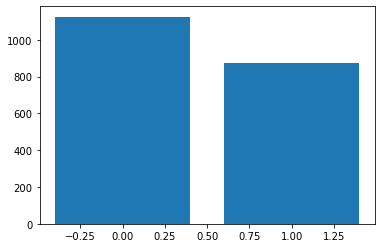

Max value: 1


In [9]:
x_genders = list(set(genders))
y_genders= [genders.count(i) for i in x_genders]
plt.bar(x_genders,y_genders)
plt.show()
print("Max value:",max(genders))

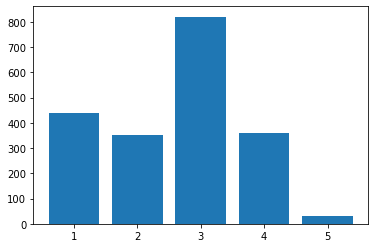

Max value: 5


In [10]:
x_ages = list(set(age_categories))
y_ages = [age_categories.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(age_categories))

In [11]:
img_all = pd.DataFrame()
img_all["age"] = age_categories
img_all["gender"] = genders

img_gender = pd.DataFrame()
img_gender["gender"] = genders

img_age = pd.DataFrame()
img_age["age"] = age_categories

print("age\n", img_age.age.value_counts())
print("gender\n", img_gender.gender.value_counts())

age
 3    820
1    437
4    360
2    351
5     32
Name: age, dtype: int64
gender
 0    1125
1     875
Name: gender, dtype: int64


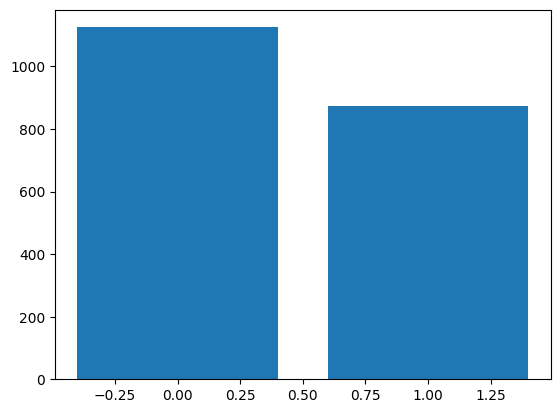

Max value: 1


In [44]:
x_genders = list(set(genders))
y_genders= [genders.count(i) for i in x_genders]
plt.bar(x_genders,y_genders)
plt.show()
print("Max value:",max(genders))

Gender: 1 Age: 100


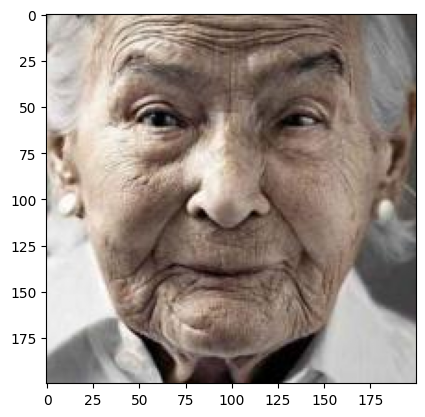

In [45]:
def display(img):
    plt.imshow(img)
    plt.show()
    
idx = 9
if idx < len(images):
    sample = images[idx]
    print("Gender:", genders[idx], "Age:", ages[idx])
    display(sample)
else:
    print(f"Index {idx} is out of range for the list of {len(images)} images")

In [11]:
#display_img(images, 77)

hog

In [6]:
# Extract HOG features from the images
hog_features = []
for img in images:
    #hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
    #                cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

# Normalize the features to have zero mean and unit variance
mean = np.mean(hog_features, axis=0)
std = np.std(hog_features, axis=0)
hog_features_norm = (hog_features - mean) / std

In [5]:
X_train, X_test, y_train, y_test = train_test_split(hog_features_norm, genders, test_size=0.2, random_state=42)
#print("Samples in Training:",X_train.shape[0])
#print("Samples in Testing:",X_test.shape[0])

In [6]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Evaluate the classifier on the testing data
accuracy = svc.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.81


Autoencoder

In [15]:
# for this the order is first the split of the data then using autoencoder on train_x
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

In [16]:
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [ ]:
# class Autoencoder(Model):
#   def __init__(self):
#     super(Autoencoder, self).__init__()

#     self.encoder = tf.keras.Sequential([
#       #didnt increase filter count in encoder and decrease equally in decoder because
#       #it can lead to overfitting

#       layers.Input(shape=(200, 200, 3)),
#       layers.Conv2D(64, (3,3), activation='relu', padding='same'),
#       layers.MaxPooling2D((2,2), padding='same'),
#       layers.Conv2D(32, (3,3), activation='relu', padding='same'),
#       layers.MaxPooling2D((2,2), padding='same'),
#       layers.Conv2D(16, (3,3), activation='relu', padding='same'),
#       layers.MaxPooling2D((2,2), padding='same'),])
    
#     self.decoder = tf.keras.Sequential([
#       #having conv2D here helps to avoid checkerboard artifacts
#       #which are alternating points of colors (like checkerboard)
#       #that are consequence of deconvolutioning an image and cause 
#       #loss of quality in final reconstruction

#       layers.Conv2D(16, (3,3), activation='relu', padding='same'),
#       layers.Conv2DTranspose(32, (3,3), activation='relu', padding='same'),
#       layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same'),
#       layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same'),])
    
#       #sigmoid is required for final layer since we are evaluating with
#       #binary cross entropy
    
#       #maybe use strides in the layers too

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# # binary cross entropy is good for image feature extraction especially when images are normalized

# autoencoder = Autoencoder()
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [55]:
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
x = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(x)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)


#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_116 (Conv2D)         (None, 100, 100, 64)      1792      
                                                                 
 conv2d_117 (Conv2D)         (None, 50, 50, 32)        18464     
                                                                 
 conv2d_118 (Conv2D)         (None, 25, 25, 16)        4624      
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_68 (Dense)            (None, 2000)              20002000  
                                                                 
 dense_69 (Dense)            (None, 10000)             200

In [56]:
#using validation_data is good for detecting overfitting as 
#it does early stopping when the performance is no longer improving

autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 2,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),
)

Epoch 1/2
13/13 [==============================] - 7s 520ms/step - loss: 0.6892 - val_loss: 0.6767
Epoch 2/2
13/13 [==============================] - 6s 500ms/step - loss: 0.6684 - val_loss: 0.6666


In [57]:
#encoder = Model(inputs=input, outputs=autoencoder.get_layer("conv2d_transpose_55").output)
encoded_train = autoencoder.predict(X_train)
encoded_test = autoencoder.predict(X_test)

encoded_train = encoded_train.reshape((encoded_train.shape[0], -1))
encoded_test = encoded_test.reshape((encoded_test.shape[0], -1))

4/4 [==============================] - 0s 72ms/step


In [58]:
clf = SVC(kernel='linear')
clf.fit(encoded_train, y_train)

# Evaluate the classifier on the testing data
accuracy = clf.score(encoded_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.62


## Base CNN

### gender

In [50]:
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

In [51]:
cnn = Sequential()
cnn.add(layers.Input(shape=X_train[0].shape))
cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(layers.Dropout(0.2))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(Dense(1, activation='sigmoid'))

#para ages mudar para o numero de buckets(sao 6)

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)      

In [52]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [53]:
#for age use categorical_crossentropy instead
cnn.compile(optimizer="adam", loss="binary_crossentropy")

history_base = cnn.fit(X_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/3
50/50 [==============================] - 11s 215ms/step - loss: 0.5915 - val_loss: 0.4763
Epoch 2/3
50/50 [==============================] - 11s 219ms/step - loss: 0.4687 - val_loss: 0.3685
Epoch 3/3
50/50 [==============================] - 11s 221ms/step - loss: 0.3774 - val_loss: 0.4535


4/4 [==============================] - 0s 30ms/step
MCC:  0.2718465554777868
Accuracy:  0.64


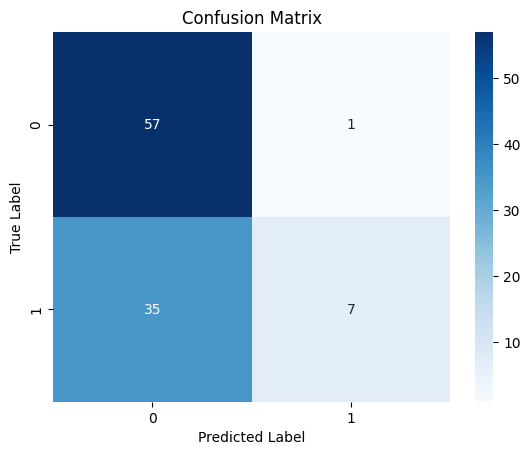

In [51]:
#loss, accuracy = cnn.evaluate(X_test, y_test)
#print("Accuracy:", accuracy)

y_pred = cnn.predict(X_test).round()

mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
print("Accuracy: ", accuracy)
#print(classification_report(y_test, y_pred))


labelGender = list(set(genders))

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)

# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()


### age

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images, age_categories, test_size=0.2, random_state=42)

In [22]:
num_classes= len(list(set(age_categories)))

model = Sequential()
model.add(layers.Input(shape=X_train[0].shape))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))


In [75]:
num_classes= len(list(set(age_categories)))

cnn = Sequential()
cnn.add(layers.Input(shape=X_train[0].shape))
cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(layers.Dropout(0.2))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(Dense(num_classes + 1, activation='softmax'))

#para ages mudar para o numero de buckets(sao 6)

cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 25, 25, 64)      

In [19]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [28]:
X_test

array([[[[0.64705882, 0.42745098, 0.42352941],
         [0.64705882, 0.42745098, 0.42352941],
         [0.65882353, 0.43137255, 0.42745098],
         ...,
         [0.54901961, 0.27058824, 0.29411765],
         [0.52156863, 0.24313725, 0.26666667],
         [0.50196078, 0.22352941, 0.24705882]],

        [[0.6627451 , 0.44313725, 0.43921569],
         [0.6627451 , 0.44313725, 0.43921569],
         [0.67058824, 0.44313725, 0.43921569],
         ...,
         [0.56078431, 0.29019608, 0.30980392],
         [0.54117647, 0.2627451 , 0.28627451],
         [0.51764706, 0.24705882, 0.26666667]],

        [[0.68235294, 0.4627451 , 0.45882353],
         [0.68235294, 0.4627451 , 0.45882353],
         [0.69019608, 0.4627451 , 0.45882353],
         ...,
         [0.57254902, 0.31372549, 0.32941176],
         [0.56078431, 0.28627451, 0.31764706],
         [0.5372549 , 0.2745098 , 0.30196078]],

        ...,

        [[0.15294118, 0.14509804, 0.19607843],
         [0.14901961, 0.14117647, 0.19215686]

In [24]:
#for age use categorical_crossentropy instead
#cnn.compile(optimizer="adam", loss="categorical_crossentropy")

#for age use categorical_crossentropy instead
model.compile(optimizer="adam", loss="categorical_crossentropy")

history_base = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/3


ValueError: in user code:

    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\ASobreira\anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 5) are incompatible


In [77]:
#for age use categorical_crossentropy instead
#cnn.compile(optimizer="adam", loss="categorical_crossentropy")

cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_base = cnn.fit(X_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/3


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 11s 202ms/step - loss: 1.4041 - accuracy: 0.4519 - val_loss: 1.1373 - val_accuracy: 0.5400
Epoch 2/3
50/50 [==============================] - 11s 217ms/step - loss: 1.1015 - accuracy: 0.5506 - val_loss: 0.9711 - val_accuracy: 0.5575
Epoch 3/3
50/50 [==============================] - 11s 216ms/step - loss: 0.9454 - accuracy: 0.5838 - val_loss: 0.8588 - val_accuracy: 0.5850


In [16]:
y_pred = model.predict(X_test)
y_pred

13/13 [==============================] - 10s 287ms/step


array([[-6.511167  ,  4.242211  ,  2.5258183 ,  1.2851119 , -1.4818478 ,
        -0.6094897 ],
       [-6.8596706 , -3.7948265 ,  3.2507322 ,  5.153275  ,  4.1675615 ,
        -2.6936116 ],
       [-5.841744  , -0.9499442 ,  2.8919034 ,  3.4487739 ,  2.6017807 ,
        -1.9525349 ],
       ...,
       [-7.0469503 ,  6.8281565 ,  1.4388205 ,  0.2327179 , -1.7201176 ,
        -0.84993446],
       [-5.2849846 ,  0.18034069,  2.3154745 ,  2.8730133 ,  1.5080625 ,
        -1.4258349 ],
       [-6.3619084 , -0.30021688,  3.0226648 ,  3.8550432 ,  1.4278905 ,
        -1.8247305 ]], dtype=float32)

In [81]:
#loss, accuracy = cnn.evaluate(X_test, y_test)
#print("Accuracy:", accuracy)

y_pred = model.predict(X_test).round()

mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
print("Accuracy: ", accuracy)
#print(classification_report(y_test, y_pred))


labelAge = list(set(age_categories))
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelAge, yticklabels=labelAge)
# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

array([[7.0833840e-04, 8.5869521e-01, 1.0811699e-01, 2.1241907e-02,
        8.6521460e-03, 2.5853531e-03],
       [3.1279436e-05, 5.2313734e-04, 1.7469531e-01, 6.0793054e-01,
        2.1091866e-01, 5.9010764e-03],
       [1.6583540e-04, 4.6691969e-03, 1.5886554e-01, 5.5957097e-01,
        2.6743186e-01, 9.2966296e-03],
       ...,
       [4.0153791e-05, 9.8346925e-01, 1.2732913e-02, 1.6667577e-03,
        2.0223616e-03, 6.8536647e-05],
       [5.8666337e-04, 1.1147327e-02, 1.6991188e-01, 5.4141718e-01,
        2.6169944e-01, 1.5237512e-02],
       [1.3336011e-04, 3.3607334e-03, 1.3070898e-01, 7.6585197e-01,
        9.5458888e-02, 4.4860258e-03]], dtype=float32)

In [79]:
#loss, accuracy = cnn.evaluate(X_test, y_test)
#print("Accuracy:", accuracy)

y_pred = cnn.predict(X_test).round()

mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
print("Accuracy: ", accuracy)
#print(classification_report(y_test, y_pred))


labelAge = list(set(age_categories))
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelAge, yticklabels=labelAge)
# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

13/13 [==============================] - 0s 36ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

## HOG 


### gender

In [7]:
X_train, X_test, y_train, y_test = train_test_split(hog_features_norm, genders, test_size=0.2, random_state=42)

In [12]:
X_train[0].shape

(20736,)

In [10]:
cnn = Sequential()

#tratado
cnn.add(layers.Reshape((144, 144, 1), input_shape=(20736,)))
#cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=X_train[1].shape))

cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(layers.Dropout(0.2))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 144, 144, 1)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 1)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 72, 72, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [13]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [14]:
cnn.compile(optimizer="adam", loss="binary_crossentropy")

history = cnn.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/5
13/13 [==============================] - 1s 56ms/step - loss: 0.8877 - val_loss: 0.6984
Epoch 2/5
13/13 [==============================] - 1s 53ms/step - loss: 0.6835 - val_loss: 0.6868
Epoch 3/5
13/13 [==============================] - 1s 51ms/step - loss: 0.6423 - val_loss: 0.6417
Epoch 4/5
13/13 [==============================] - 1s 51ms/step - loss: 0.5858 - val_loss: 0.6751
Epoch 5/5
13/13 [==============================] - 1s 51ms/step - loss: 0.4846 - val_loss: 0.8054


In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

duvidas tiradas com prof

esta autoencoder,vgg16,hog a funfar 
ver svm e cnn results
correr agora só com gender

(prof diz que é preferivel usar o que temos acima e se houver tempo e tudo acima
funcionar a dar resultados e tudo entao só depois tentar fazer o orb)

---

quando isto tudo acima estiver ok tentar tudo denovo para dar predict de idades
que pode ser feito de 2 maneiras:
regressao 
ou
idades agrupadas em intervalos (10 a 10 anos por exemplo)

----

tentar no fit dos modelos(cnn e encoder):

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

quando tiver tudo a dar para fazer early stopping com o parametro de patience